# 1. Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=[224,224]
train_path='D:/users/dataset/train'
valid_path='D:/users/dataset/test'

In [4]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

for layer in vgg16.layers:
    layer.trainable=False

In [5]:
folders=glob('D:/users/dataset/train/*')
folders

['D:/users/dataset/train\\African', 'D:/users/dataset/train\\Asian']

In [6]:
len(folders)

2

In [7]:
x=Flatten()(vgg16.output)

prediction=Dense(len(folders),activation='softmax')(x)

In [8]:
model=Model(inputs=vgg16.input,outputs=prediction)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

print('Training Length:\n')
train_data = train_datagen.flow_from_directory(
    'D:/users/dataset/train',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
print()
print('Testing Length:\n')
test_data = test_datagen.flow_from_directory(
    'D:/users/dataset/test',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Training Length:

Found 840 images belonging to 2 classes.

Testing Length:

Found 188 images belonging to 2 classes.


In [11]:
result=model.fit(train_data,
                 steps_per_epoch=len(train_data),epochs=10,
                 validation_data=test_data,
                 validation_steps=len(test_data)
                )

Epoch 1/10
27/27 [==============================] - 358s 13s/step - loss: 1.0780 - accuracy: 0.5488 - val_loss: 0.5058 - val_accuracy: 0.7234
Epoch 2/10
27/27 [==============================] - 242s 9s/step - loss: 0.6388 - accuracy: 0.6488 - val_loss: 0.5683 - val_accuracy: 0.6968
Epoch 3/10
27/27 [==============================] - 230s 8s/step - loss: 0.5589 - accuracy: 0.7131 - val_loss: 0.3799 - val_accuracy: 0.8298
Epoch 4/10
27/27 [==============================] - 236s 9s/step - loss: 0.5239 - accuracy: 0.7333 - val_loss: 0.3747 - val_accuracy: 0.8404
Epoch 5/10
27/27 [==============================] - 227s 8s/step - loss: 0.5230 - accuracy: 0.7464 - val_loss: 0.3669 - val_accuracy: 0.8617
Epoch 6/10
27/27 [==============================] - 214s 8s/step - loss: 0.4105 - accuracy: 0.8167 - val_loss: 0.3666 - val_accuracy: 0.8723
Epoch 7/10
27/27 [==============================] - 260s 10s/step - loss: 0.4029 - accuracy: 0.8024 - val_loss: 0.3384 - val_accuracy: 0.8457
Epoch 8/10


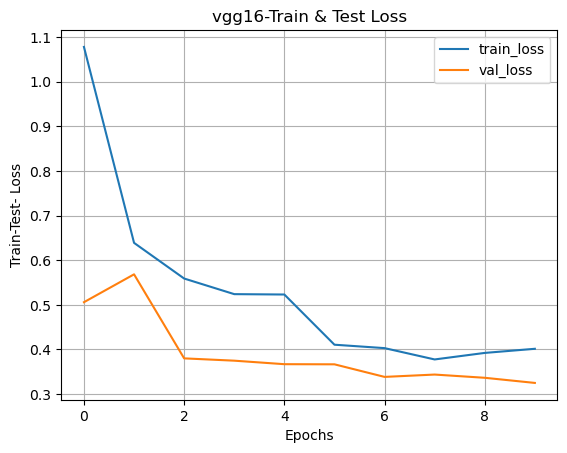

<Figure size 640x480 with 0 Axes>

In [12]:
plt.title('vgg16-Train & Test Loss')
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Loss & Val_loss')

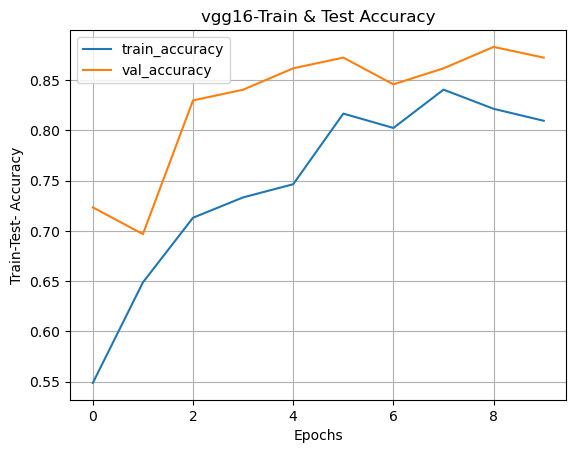

<Figure size 640x480 with 0 Axes>

In [13]:
plt.title('vgg16-Train & Test Accuracy')
plt.plot(result.history['accuracy'],label='train_accuracy') 
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Accuracy & Val_accuracy')

In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('VGG16_african_asian_classify.h5')

C:\Users\Uday\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save('VGG16_classify.keras')

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_data,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_data.classes,ypred,target_names=['african','asian']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_data.classes,ypred))

6/6 [==============================] - 42s 7s/step
Confusion Matrix
[[54 43]
 [57 34]]
Classification Report
              precision    recall  f1-score   support

     african       0.49      0.56      0.52        97
       asian       0.44      0.37      0.40        91

    accuracy                           0.47       188
   macro avg       0.46      0.47      0.46       188
weighted avg       0.46      0.47      0.46       188

Accuracy Score
0.46808510638297873


<Axes: >

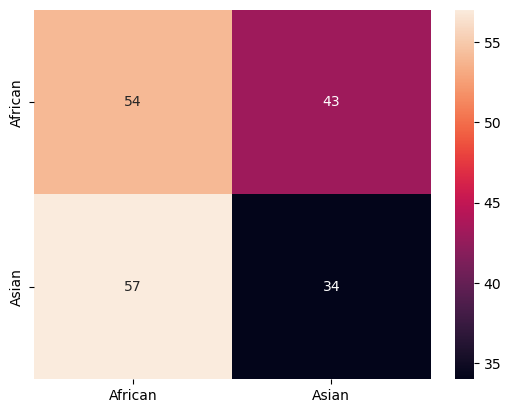

In [19]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_data.classes,ypred),annot=True,xticklabels=['African','Asian'],
 yticklabels=['African','Asian'])

# 2. Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

# Using InceptionV3 

In [20]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
IMAGE_SIZE = [224, 224]
train_path = 'D:/users/Multiclass_dataset/seg_train'
valid_path = 'D:/users/Multiclass_dataset/seg_test'

In [22]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inceptionv3.layers:
    layer.trainable = False

In [23]:
folders = glob('D:/users/Multiclass_dataset/seg_train/*')
folders

['D:/users/Multiclass_dataset/seg_train\\buildings',
 'D:/users/Multiclass_dataset/seg_train\\forest',
 'D:/users/Multiclass_dataset/seg_train\\mountain',
 'D:/users/Multiclass_dataset/seg_train\\sea']

In [24]:
x = Flatten()(inceptionv3.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [25]:
model = Model(inputs=inceptionv3.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 25, 25, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 25, 25, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 25, 25, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 25, 25, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 12, 12, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 12, 12, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 12, 12, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 5, 5, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 5, 5, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 5, 5, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [26]:
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [27]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

print('Training Length:\n')
train_data = train_datagen.flow_from_directory(
    'D:/users/Multiclass_dataset/seg_train',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
print()
print('Testing Length:\n')
test_data = test_datagen.flow_from_directory(
    'D:/users/Multiclass_dataset/seg_test',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Training Length:

Found 9248 images belonging to 4 classes.

Testing Length:

Found 1946 images belonging to 4 classes.


In [28]:
r = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data))

Epoch 1/10
289/289 [==============================] - 685s 2s/step - loss: 0.5972 - accuracy: 0.9428 - val_loss: 0.3793 - val_accuracy: 0.9640
Epoch 2/10
289/289 [==============================] - 576s 2s/step - loss: 0.3670 - accuracy: 0.9675 - val_loss: 0.2940 - val_accuracy: 0.9753
Epoch 3/10
289/289 [==============================] - 614s 2s/step - loss: 0.3905 - accuracy: 0.9735 - val_loss: 0.3203 - val_accuracy: 0.9789
Epoch 4/10
289/289 [==============================] - 612s 2s/step - loss: 0.4648 - accuracy: 0.9728 - val_loss: 0.3712 - val_accuracy: 0.9769
Epoch 5/10
289/289 [==============================] - 604s 2s/step - loss: 0.3411 - accuracy: 0.9792 - val_loss: 0.6525 - val_accuracy: 0.9615
Epoch 6/10
289/289 [==============================] - 638s 2s/step - loss: 0.3069 - accuracy: 0.9810 - val_loss: 0.4396 - val_accuracy: 0.9738
Epoch 7/10
289/289 [==============================] - 584s 2s/step - loss: 0.3191 - accuracy: 0.9808 - val_loss: 0.6078 - val_accuracy: 0.9723

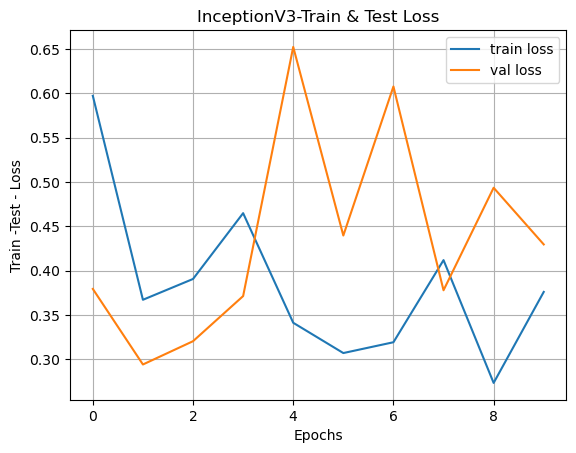

<Figure size 640x480 with 0 Axes>

In [29]:
plt.title('InceptionV3-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--LossVal_loss')

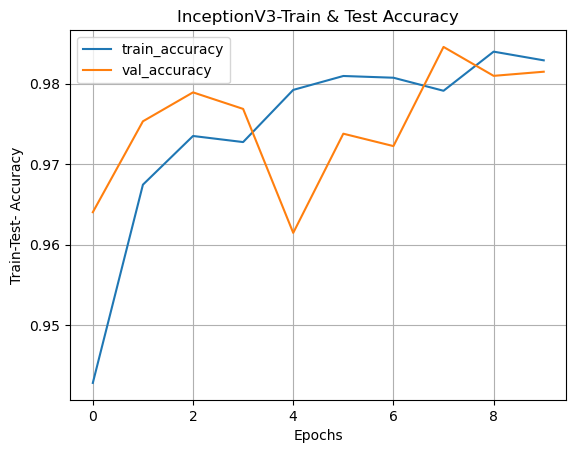

<Figure size 640x480 with 0 Axes>

In [30]:
plt.title('InceptionV3-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy') 
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--Accuracy & Val_accuracy')

In [31]:
import tensorflow as tf
from keras.models import load_model
model.save('InceptionV3model.h5')

C:\Users\Uday\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 25, 25, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 25, 25, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 25, 25, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 25, 25, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 12, 12, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 12, 12, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 12, 12, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 5, 5, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 5, 5, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 5, 5, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_data.classes)
steps = num_samples//batch_size
Y_pred = model.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'forest', 'mountain', 'sea']
print(classification_report(test_data.classes, y_pred, target_names=target_names))

C:\Users\Uday\AppData\Local\Temp\ipykernel_6716\1940951386.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data)


Confusion Matrix
[[ 89 116 119 113]
 [107 127 115 125]
 [122 113 150 140]
 [123 119 134 134]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.20      0.20      0.20       437
      forest       0.27      0.27      0.27       474
    mountain       0.29      0.29      0.29       525
         sea       0.26      0.26      0.26       510

    accuracy                           0.26      1946
   macro avg       0.26      0.26      0.26      1946
weighted avg       0.26      0.26      0.26      1946



<Axes: >

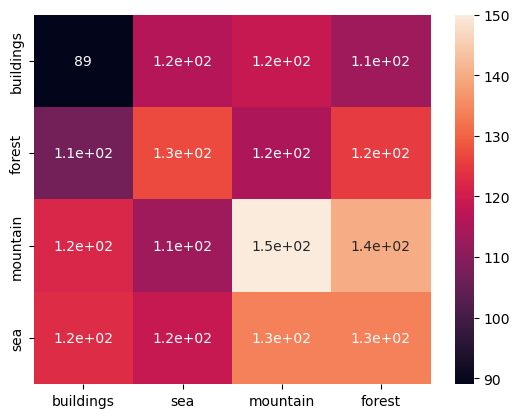

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_data.classes, y_pred),annot=True,xticklabels=['buildings','sea','mountain','forest'],
            yticklabels=['buildings','forest','mountain','sea'])

# Using Mobilenet

In [35]:
from tensorflow.keras.applications import MobileNet

In [36]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 4s 0us/step


In [37]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [38]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [39]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

print('Training Length:\n')
train_data = train_datagen.flow_from_directory(
    'D:/users/Multiclass_dataset/seg_train',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
print()
print('Testing Length:\n')
test_data = test_datagen.flow_from_directory(
    'D:/users/Multiclass_dataset/seg_test',  
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Training Length:

Found 9248 images belonging to 4 classes.

Testing Length:

Found 1946 images belonging to 4 classes.


In [40]:
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [41]:
r = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data))

Epoch 1/5
289/289 [==============================] - 331s 1s/step - loss: 0.6023 - accuracy: 0.9482 - val_loss: 0.4781 - val_accuracy: 0.9702
Epoch 2/5
289/289 [==============================] - 318s 1s/step - loss: 0.3208 - accuracy: 0.9760 - val_loss: 0.6634 - val_accuracy: 0.9681
Epoch 3/5
289/289 [==============================] - 317s 1s/step - loss: 0.2906 - accuracy: 0.9825 - val_loss: 0.3916 - val_accuracy: 0.9784
Epoch 4/5
289/289 [==============================] - 305s 1s/step - loss: 0.3160 - accuracy: 0.9804 - val_loss: 0.6837 - val_accuracy: 0.9697
Epoch 5/5
289/289 [==============================] - 306s 1s/step - loss: 0.2700 - accuracy: 0.9856 - val_loss: 0.7105 - val_accuracy: 0.9702


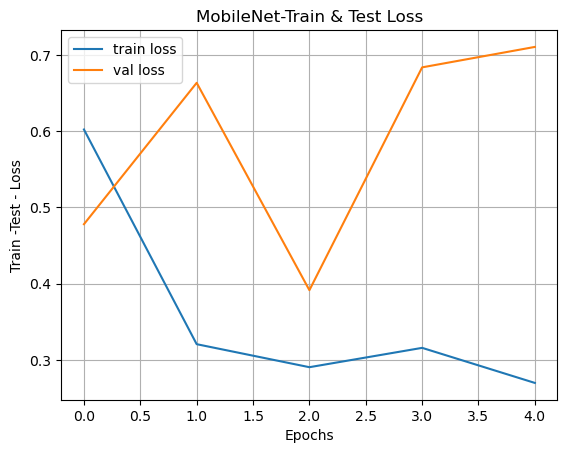

<Figure size 640x480 with 0 Axes>

In [42]:
plt.title('MobileNet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--LossVal_loss')

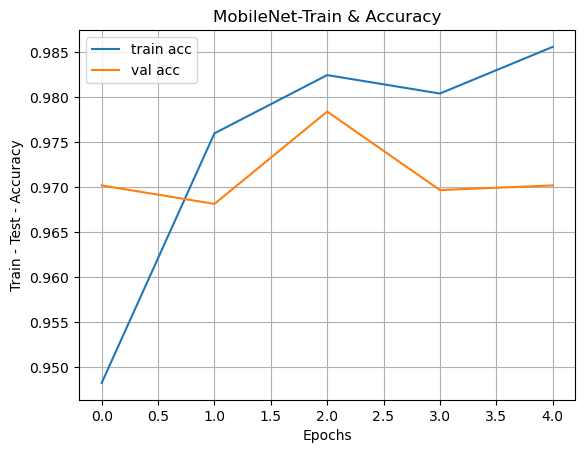

<Figure size 640x480 with 0 Axes>

In [43]:
plt.title('MobileNet-Train & Accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train - Test - Accuracy')
plt.grid()
plt.show()
plt.savefig('MobileNet AccVal_acc')

In [44]:
import tensorflow as tf
from keras.models import load_model
model.save('MobileNetmodel.h5')

C:\Users\Uday\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_data.classes)
steps = num_samples//batch_size
Y_pred = model.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'forest', 'mountain', 'sea']
print(classification_report(test_data.classes, y_pred, target_names=target_names))

C:\Users\Uday\AppData\Local\Temp\ipykernel_6716\1940951386.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data)


Confusion Matrix
[[ 92 109 136 100]
 [111 120 131 112]
 [125 126 139 135]
 [104 130 137 139]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.21      0.21      0.21       437
      forest       0.25      0.25      0.25       474
    mountain       0.26      0.26      0.26       525
         sea       0.29      0.27      0.28       510

    accuracy                           0.25      1946
   macro avg       0.25      0.25      0.25      1946
weighted avg       0.25      0.25      0.25      1946



<Axes: >

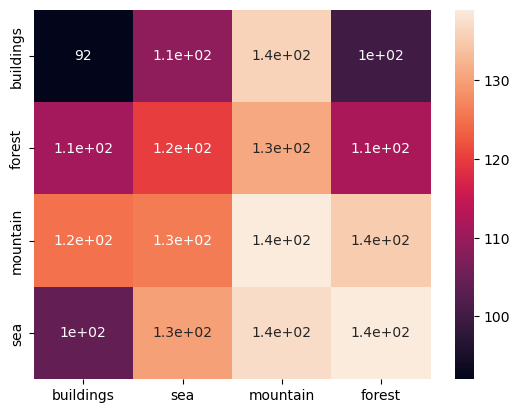

In [47]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_data.classes, y_pred),annot=True,xticklabels=['buildings','sea','mountain','forest'],
            yticklabels=['buildings','forest','mountain','sea'])